In [1]:
# This script is intended to cluster the kinases proteins in subfamilies given by uniprot

In [17]:
import pandas as pd
import Bio
import matplotlib.pyplot as plt

In [2]:
cter = pd.read_csv('../raw_data/uniprot_kd_cre_cter.gz', sep= '\t', compression= 'gzip')
cter.columns = cter.columns.str.lower().str.replace(" ", "_")
cter.drop(columns= ['from', 'entry_name'], inplace= True)
cter

,entry,length,domain_[ft],protein_families,pfam,interpro,sequence
0,A0A2I0BVG8,524,"DOMAIN 56..325; /note=""Protein kinase""; /evide...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MGCSQSSNVKDFKTRRSKFTNGNNYGKSGNNKNSEDLAINPGMYVR...
1,A0A509AFG4,554,"DOMAIN 110..365; /note=""Protein kinase""; /evid...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MNQLCVERNLSISTAYIKSKPKKYIERIKKKKSSNKSIKSQHKFEG...
2,A0A509AHB6,523,"DOMAIN 57..324; /note=""Protein kinase""; /evide...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MGCNQSKSANDVRGNKVNHVNSKKKNNKREDTNDGEEIAINPGMYV...
3,A0A509AQE6,562,"DOMAIN 118..372; /note=""Protein kinase""; /evid...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MCEHKANNKNDGEFVNLKEKNENNHCGNTKSTIADCDDDYSIITLC...
4,A0A5K1K8H0,568,"DOMAIN 125..379; /note=""Protein kinase""; /evid...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MKETEVEDMDTNRKDGKIKKKEKIVNMKNEEVKSTTKSTLADSDED...
...,...,...,...,...,...,...,...
189,Q9ZSA2,531,"DOMAIN 80..338; /note=""Protein kinase""; /evide...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MGCFSSKHRKTQNDGGEKSIPINPVQTHVVPEHRKPQTPTPKPMTQ...
190,Q9ZSA3,498,"DOMAIN 36..305; /note=""Protein kinase""; /evide...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MGNCCGSKPLTASDIVSDQKQETILGKPLEDIKKHYSFGDELGKGN...
191,Q9ZSA4,485,"DOMAIN 28..290; /note=""Protein kinase""; /evide...","Protein kinase superfamily, Ser/Thr protein ki...",PF13499;PF00069;,IPR011992;IPR018247;IPR002048;IPR011009;IPR000...,MGCFSSKELQQSKRTILEKPLVDITKIYILGEELGRGNFGLTRKCV...
192,Q9ZUZ2,595,"DOMAIN 143..405; /note=""Protein kinase""; /evid...","Protein kinase superfamily, Ser/Thr protein ki...",PF00069;,IPR011992;IPR002048;IPR011009;IPR000719;IPR017...,MGQCYGKVNQSKQNGEEEANTTTYVVSGDGNQIQPLTPVNYGRAKN...


In [13]:
cter.entry.nunique()

194

In [3]:
cter.protein_families[0]

'Protein kinase superfamily, Ser/Thr protein kinase family, CDPK subfamily'

In [4]:
families = cter[['entry', 'protein_families']]
families

,entry,protein_families
0,A0A2I0BVG8,"Protein kinase superfamily, Ser/Thr protein ki..."
1,A0A509AFG4,"Protein kinase superfamily, Ser/Thr protein ki..."
2,A0A509AHB6,"Protein kinase superfamily, Ser/Thr protein ki..."
3,A0A509AQE6,"Protein kinase superfamily, Ser/Thr protein ki..."
4,A0A5K1K8H0,"Protein kinase superfamily, Ser/Thr protein ki..."
...,...,...
189,Q9ZSA2,"Protein kinase superfamily, Ser/Thr protein ki..."
190,Q9ZSA3,"Protein kinase superfamily, Ser/Thr protein ki..."
191,Q9ZSA4,"Protein kinase superfamily, Ser/Thr protein ki..."
192,Q9ZUZ2,"Protein kinase superfamily, Ser/Thr protein ki..."


In [5]:
families.protein_families = families.protein_families.str.split(",")
families = families.explode("protein_families").reset_index()
families.protein_families = families.protein_families.str.strip()
families

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,index,entry,protein_families
0,0,A0A2I0BVG8,Protein kinase superfamily
1,0,A0A2I0BVG8,Ser/Thr protein kinase family
2,0,A0A2I0BVG8,CDPK subfamily
3,1,A0A509AFG4,Protein kinase superfamily
4,1,A0A509AFG4,Ser/Thr protein kinase family
...,...,...,...
550,192,Q9ZUZ2,Ser/Thr protein kinase family
551,192,Q9ZUZ2,CDPK subfamily
552,193,Q9ZV15,Protein kinase superfamily
553,193,Q9ZV15,Ser/Thr protein kinase family


In [6]:
families.protein_families.nunique()

23

In [7]:
families.protein_families.value_counts()

Protein kinase superfamily            194
Ser/Thr protein kinase family         103
CDPK subfamily                         91
CAMK Ser/Thr protein kinase family     51
CaMK subfamily                         17
SNF1 subfamily                         16
AGC Ser/Thr protein kinase family      13
S6 kinase subfamily                    10
Tyr protein kinase family               7
CK1 Ser/Thr protein kinase family       6
STE Ser/Thr protein kinase family       6
Casein kinase I subfamily               6
CSF-1/PDGF receptor subfamily           6
NIM1 subfamily                          5
STE20 subfamily                         5
DAP kinase subfamily                    4
WNK subfamily                           4
CMGC Ser/Thr protein kinase family      4
HIPK subfamily                          3
DMPK subfamily                          1
MAP kinase subfamily                    1
CDC5/Polo subfamily                     1
MAP kinase kinase kinase subfamily      1
Name: protein_families, dtype: int

In [22]:
# Superfamily
supfam = families[families.protein_families.str.endswith("superfamily")]
supfam = supfam.rename(columns= {'protein_families': 'superfamily'})
supfam

,index,entry,superfamily
0,0,A0A2I0BVG8,Protein kinase superfamily
3,1,A0A509AFG4,Protein kinase superfamily
6,2,A0A509AHB6,Protein kinase superfamily
9,3,A0A509AQE6,Protein kinase superfamily
12,4,A0A5K1K8H0,Protein kinase superfamily
...,...,...,...
540,189,Q9ZSA2,Protein kinase superfamily
543,190,Q9ZSA3,Protein kinase superfamily
546,191,Q9ZSA4,Protein kinase superfamily
549,192,Q9ZUZ2,Protein kinase superfamily


<AxesSubplot:>

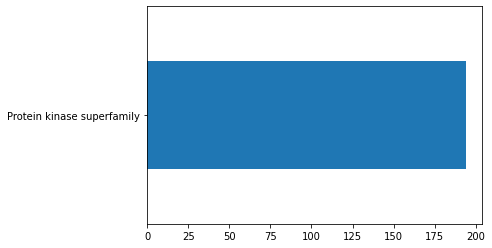

In [24]:
supfam.superfamily.value_counts()[::-1].plot(kind='barh')

In [25]:
# Family
fam = families[families.protein_families.str.endswith("family")]
fam = fam.rename(columns= {'protein_families': 'family'})
fam

,index,entry,family
0,0,A0A2I0BVG8,Protein kinase superfamily
1,0,A0A2I0BVG8,Ser/Thr protein kinase family
2,0,A0A2I0BVG8,CDPK subfamily
3,1,A0A509AFG4,Protein kinase superfamily
4,1,A0A509AFG4,Ser/Thr protein kinase family
...,...,...,...
550,192,Q9ZUZ2,Ser/Thr protein kinase family
551,192,Q9ZUZ2,CDPK subfamily
552,193,Q9ZV15,Protein kinase superfamily
553,193,Q9ZV15,Ser/Thr protein kinase family


In [29]:
fam = fam[~fam.family.str.endswith("superfamily")]
fam = fam[~fam.family.str.endswith("subfamily")]
fam

,index,entry,family
1,0,A0A2I0BVG8,Ser/Thr protein kinase family
4,1,A0A509AFG4,Ser/Thr protein kinase family
7,2,A0A509AHB6,Ser/Thr protein kinase family
10,3,A0A509AQE6,Ser/Thr protein kinase family
13,4,A0A5K1K8H0,Ser/Thr protein kinase family
...,...,...,...
541,189,Q9ZSA2,Ser/Thr protein kinase family
544,190,Q9ZSA3,Ser/Thr protein kinase family
547,191,Q9ZSA4,Ser/Thr protein kinase family
550,192,Q9ZUZ2,Ser/Thr protein kinase family


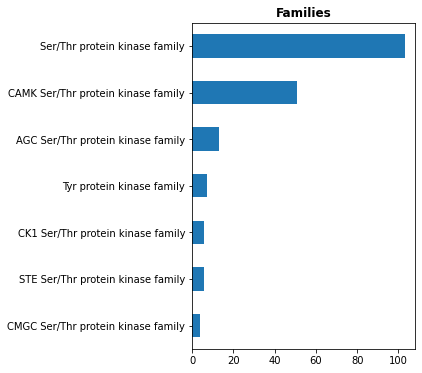

In [35]:
fam.family.value_counts()[::-1].plot(kind='barh', figsize= (4,6))
plt.title("Families", fontweight= 'bold')
plt.show()

In [21]:
# Subset by subfamilies
subf = families[families.protein_families.str.endswith("subfamily")]
subf = subf.rename(columns= {'protein_families': 'subfamily'})
subf

,index,entry,subfamily
2,0,A0A2I0BVG8,CDPK subfamily
5,1,A0A509AFG4,CDPK subfamily
8,2,A0A509AHB6,CDPK subfamily
11,3,A0A509AQE6,CDPK subfamily
14,4,A0A5K1K8H0,CDPK subfamily
...,...,...,...
542,189,Q9ZSA2,CDPK subfamily
545,190,Q9ZSA3,CDPK subfamily
548,191,Q9ZSA4,CDPK subfamily
551,192,Q9ZUZ2,CDPK subfamily


In [12]:
subf.entry.nunique()

171

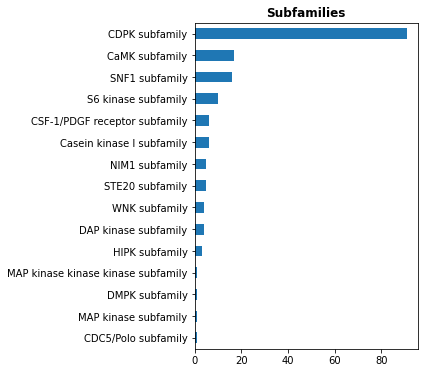

In [38]:
subf.subfamily.value_counts()[::-1].plot(kind='barh', figsize= (4,6))
plt.title("Subfamilies", fontweight= 'bold')
plt.show()

In [43]:
merged = fam.merge(subf, how= 'left')
merged

,index,entry,family,subfamily
0,0,A0A2I0BVG8,Ser/Thr protein kinase family,CDPK subfamily
1,1,A0A509AFG4,Ser/Thr protein kinase family,CDPK subfamily
2,2,A0A509AHB6,Ser/Thr protein kinase family,CDPK subfamily
3,3,A0A509AQE6,Ser/Thr protein kinase family,CDPK subfamily
4,4,A0A5K1K8H0,Ser/Thr protein kinase family,CDPK subfamily
...,...,...,...,...
185,189,Q9ZSA2,Ser/Thr protein kinase family,CDPK subfamily
186,190,Q9ZSA3,Ser/Thr protein kinase family,CDPK subfamily
187,191,Q9ZSA4,Ser/Thr protein kinase family,CDPK subfamily
188,192,Q9ZUZ2,Ser/Thr protein kinase family,CDPK subfamily


In [80]:
merged.entry.nunique()

190

In [79]:
merged.subfamily.value_counts()

CDPK subfamily                        91
CaMK subfamily                        17
SNF1 subfamily                        16
S6 kinase subfamily                   10
CSF-1/PDGF receptor subfamily          6
Casein kinase I subfamily              6
NIM1 subfamily                         5
STE20 subfamily                        5
WNK subfamily                          4
DAP kinase subfamily                   4
HIPK subfamily                         3
MAP kinase kinase kinase subfamily     1
DMPK subfamily                         1
MAP kinase subfamily                   1
CDC5/Polo subfamily                    1
Name: subfamily, dtype: int64

In [81]:
merged[merged.subfamily == 'MAP kinase kinase kinase subfamily']

,index,entry,family,subfamily
38,38,P41279,STE Ser/Thr protein kinase family,MAP kinase kinase kinase subfamily


In [85]:
kinases[kinases.Uniprot == 'P41279']

,Uniprot,Organism,CRE (start),CRE (end),CRE (S or D),Length,KD (start),KD (end),PDB ID,PDB Res (Å),AF,Status
83,P41279,H. sapiens,395,467,D,NaN,138,388,no,no,AF-P41279-F1,known


In [46]:
merged.groupby("family")["subfamily"].size()

family
AGC Ser/Thr protein kinase family      13
CAMK Ser/Thr protein kinase family     51
CK1 Ser/Thr protein kinase family       6
CMGC Ser/Thr protein kinase family      4
STE Ser/Thr protein kinase family       6
Ser/Thr protein kinase family         103
Tyr protein kinase family               7
Name: subfamily, dtype: int64

In [97]:
cluster357= pd.read_csv('../raw_data/fasta_mapkkk_subfamily/357.txt', sep= '|', header= None)
cluster357 = cluster357[[1]].rename(columns= {1: 'uniprot'})

In [99]:
l = cluster357.uniprot.unique().tolist()

In [109]:
with open('../raw_data/cluster357_list.txt', "w") as f:
    for i in l:
        f.write(i + ",")

In [102]:
cter[cter.entry.isin(l)]

,entry,length,domain_[ft],protein_families,pfam,interpro,sequence
38,P41279,467,"DOMAIN 138..388; /note=""Protein kinase""; /evid...","Protein kinase superfamily, STE Ser/Thr protei...",PF00069;,IPR011009;IPR017424;IPR000719;IPR008271;,MEYMSTGSDNKEEIDLLIKHLNVSDVIDIMENLYASEEPAVYEPSL...


In [8]:
# from Bio import SeqIO
# fasta_sequences = SeqIO.parse(open('../raw_data/fasta_kd_cre_cter'), 'fasta')
# for fasta in fasta_sequences:
#     name, sequence = fasta.id, str(fasta.seq)
    

In [49]:
kinases = pd.read_csv('../datasets/kinases.tsv', sep= '\t')

In [64]:
coord = kinases[kinases.Uniprot.isin(cter.entry)][['Uniprot', 'KD (start)', 'KD (end)', 'CRE (start)', 'CRE (end)']].drop_duplicates()
coord

,Uniprot,KD (start),KD (end),CRE (start),CRE (end)
0,A0A2I0BVG8,56,325,346,353
1,A0A509AFG4,110,365,385,393
2,A0A509AHB6,57,324,345,352
4,A0A509AQE6,118,372,394,402
5,A0A5K1K8H0,125,379,400,408
...,...,...,...,...,...
295,Q9ZSA2,80,338,343,373
296,Q9ZSA3,36,305,309,339
297,Q9ZSA4,28,290,295,325
298,Q9ZUZ2,143,405,409,439


In [51]:
seqs = cter[['entry', 'sequence']]
seqs

,entry,sequence
0,A0A2I0BVG8,MGCSQSSNVKDFKTRRSKFTNGNNYGKSGNNKNSEDLAINPGMYVR...
1,A0A509AFG4,MNQLCVERNLSISTAYIKSKPKKYIERIKKKKSSNKSIKSQHKFEG...
2,A0A509AHB6,MGCNQSKSANDVRGNKVNHVNSKKKNNKREDTNDGEEIAINPGMYV...
3,A0A509AQE6,MCEHKANNKNDGEFVNLKEKNENNHCGNTKSTIADCDDDYSIITLC...
4,A0A5K1K8H0,MKETEVEDMDTNRKDGKIKKKEKIVNMKNEEVKSTTKSTLADSDED...
...,...,...
189,Q9ZSA2,MGCFSSKHRKTQNDGGEKSIPINPVQTHVVPEHRKPQTPTPKPMTQ...
190,Q9ZSA3,MGNCCGSKPLTASDIVSDQKQETILGKPLEDIKKHYSFGDELGKGN...
191,Q9ZSA4,MGCFSSKELQQSKRTILEKPLVDITKIYILGEELGRGNFGLTRKCV...
192,Q9ZUZ2,MGQCYGKVNQSKQNGEEEANTTTYVVSGDGNQIQPLTPVNYGRAKN...


In [67]:
coord = coord.merge(seqs, left_on= 'Uniprot', right_on= 'entry').drop(columns= 'entry')
coord

,Uniprot,KD (start),KD (end),CRE (start),CRE (end),sequence
0,A0A2I0BVG8,56,325,346,353,MGCSQSSNVKDFKTRRSKFTNGNNYGKSGNNKNSEDLAINPGMYVR...
1,A0A509AFG4,110,365,385,393,MNQLCVERNLSISTAYIKSKPKKYIERIKKKKSSNKSIKSQHKFEG...
2,A0A509AHB6,57,324,345,352,MGCNQSKSANDVRGNKVNHVNSKKKNNKREDTNDGEEIAINPGMYV...
3,A0A509AQE6,118,372,394,402,MCEHKANNKNDGEFVNLKEKNENNHCGNTKSTIADCDDDYSIITLC...
4,A0A5K1K8H0,125,379,400,408,MKETEVEDMDTNRKDGKIKKKEKIVNMKNEEVKSTTKSTLADSDED...
...,...,...,...,...,...,...
195,Q9ZSA2,80,338,343,373,MGCFSSKHRKTQNDGGEKSIPINPVQTHVVPEHRKPQTPTPKPMTQ...
196,Q9ZSA3,36,305,309,339,MGNCCGSKPLTASDIVSDQKQETILGKPLEDIKKHYSFGDELGKGN...
197,Q9ZSA4,28,290,295,325,MGCFSSKELQQSKRTILEKPLVDITKIYILGEELGRGNFGLTRKCV...
198,Q9ZUZ2,143,405,409,439,MGQCYGKVNQSKQNGEEEANTTTYVVSGDGNQIQPLTPVNYGRAKN...


In [68]:
# KD sequences
coord["kd_seq"] = None
for ix in coord.index:
    start = coord["KD (start)"][ix] - 1
    end = coord["KD (end)"][ix]
    coord.kd_seq[ix] = coord.sequence[ix][start : end]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
coord

,Uniprot,KD (start),KD (end),CRE (start),CRE (end),sequence,kd_seq
0,A0A2I0BVG8,56,325,346,353,MGCSQSSNVKDFKTRRSKFTNGNNYGKSGNNKNSEDLAINPGMYVR...,YFKVRKLGSGAYGEVLLCREKHGHGEKAIKVIKKSQFDKMKYSITN...
1,A0A509AFG4,110,365,385,393,MNQLCVERNLSISTAYIKSKPKKYIERIKKKKSSNKSIKSQHKFEG...,NLSEEPLGKGTYGCVYKATDKLLKIQRAVKVVSKKKLKNIPRFRQE...
2,A0A509AHB6,57,324,345,352,MGCNQSKSANDVRGNKVNHVNSKKKNNKREDTNDGEEIAINPGMYV...,YFKVRKLGSGAYGEVLLCKEKNGHSEKAIKVIKKSQFDKGRYSDDN...
3,A0A509AQE6,118,372,394,402,MCEHKANNKNDGEFVNLKEKNENNHCGNTKSTIADCDDDYSIITLC...,ELDKYKLGKGSYGNVVKAINKKTGQAKAIKIIDKKRINNIERLKRE...
4,A0A5K1K8H0,125,379,400,408,MKETEVEDMDTNRKDGKIKKKEKIVNMKNEEVKSTTKSTLADSDED...,EIDRYKLGKGSYGNVVKAVSKRTGQQRAIKIIEKKKIHNIERLKRE...
...,...,...,...,...,...,...,...
195,Q9ZSA2,80,338,343,373,MGCFSSKHRKTQNDGGEKSIPINPVQTHVVPEHRKPQTPTPKPMTQ...,YSLGKELGRGQFGITYMCKEIGTGNTYACKSILKRKLISKQDKEDV...
196,Q9ZSA3,36,305,309,339,MGNCCGSKPLTASDIVSDQKQETILGKPLEDIKKHYSFGDELGKGN...,YSFGDELGKGNFGTTYLCKENSTGKSYACKSIPKRTLSSEEEKEAV...
197,Q9ZSA4,28,290,295,325,MGCFSSKELQQSKRTILEKPLVDITKIYILGEELGRGNFGLTRKCV...,YILGEELGRGNFGLTRKCVEKSTGKTFACKTILKTKLKDEECEEDV...
198,Q9ZUZ2,143,405,409,439,MGQCYGKVNQSKQNGEEEANTTTYVVSGDGNQIQPLTPVNYGRAKN...,YELGKEVGRGHFGHTCSGRGKKGDIKDHPIAVKIISKAKMTTAIAI...


In [70]:
#CREs sequences
coord["cre_seq"] = None
for ix in coord.index:
    start = coord["CRE (start)"][ix] - 1
    end = coord["CRE (end)"][ix]
    coord.cre_seq[ix] = coord.sequence[ix][start : end]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
coord

,Uniprot,KD (start),KD (end),CRE (start),CRE (end),sequence,kd_seq,cre_seq
0,A0A2I0BVG8,56,325,346,353,MGCSQSSNVKDFKTRRSKFTNGNNYGKSGNNKNSEDLAINPGMYVR...,YFKVRKLGSGAYGEVLLCREKHGHGEKAIKVIKKSQFDKMKYSITN...,NMRKFEGS
1,A0A509AFG4,110,365,385,393,MNQLCVERNLSISTAYIKSKPKKYIERIKKKKSSNKSIKSQHKFEG...,NLSEEPLGKGTYGCVYKATDKLLKIQRAVKVVSKKKLKNIPRFRQE...,NFKNYALLL
2,A0A509AHB6,57,324,345,352,MGCNQSKSANDVRGNKVNHVNSKKKNNKREDTNDGEEIAINPGMYV...,YFKVRKLGSGAYGEVLLCKEKNGHSEKAIKVIKKSQFDKGRYSDDN...,NMRKFEGS
3,A0A509AQE6,118,372,394,402,MCEHKANNKNDGEFVNLKEKNENNHCGNTKSTIADCDDDYSIITLC...,ELDKYKLGKGSYGNVVKAINKKTGQAKAIKIIDKKRINNIERLKRE...,KFKKFHKLC
4,A0A5K1K8H0,125,379,400,408,MKETEVEDMDTNRKDGKIKKKEKIVNMKNEEVKSTTKSTLADSDED...,EIDRYKLGKGSYGNVVKAVSKRTGQQRAIKIIEKKKIHNIERLKRE...,KFKEFHKLC
...,...,...,...,...,...,...,...,...
195,Q9ZSA2,80,338,343,373,MGCFSSKHRKTQNDGGEKSIPINPVQTHVVPEHRKPQTPTPKPMTQ...,YSLGKELGRGQFGITYMCKEIGTGNTYACKSILKRKLISKQDKEDV...,APDKPIDSAVLSRMKQFRAMNKLKKLALKVI
196,Q9ZSA3,36,305,309,339,MGNCCGSKPLTASDIVSDQKQETILGKPLEDIKKHYSFGDELGKGN...,YSFGDELGKGNFGTTYLCKENSTGKSYACKSIPKRTLSSEEEKEAV...,APDKPIDNVVLSRMKQFRAMNKLKKLALKVI
197,Q9ZSA4,28,290,295,325,MGCFSSKELQQSKRTILEKPLVDITKIYILGEELGRGNFGLTRKCV...,YILGEELGRGNFGLTRKCVEKSTGKTFACKTILKTKLKDEECEEDV...,ASDKPIDGVVLSRLKRFRDANKFKKVVLKFI
198,Q9ZUZ2,143,405,409,439,MGQCYGKVNQSKQNGEEEANTTTYVVSGDGNQIQPLTPVNYGRAKN...,YELGKEVGRGHFGHTCSGRGKKGDIKDHPIAVKIISKAKMTTAIAI...,SRVIPLDILIYKLVKAYLHATPLRRAALKAL


<AxesSubplot:>

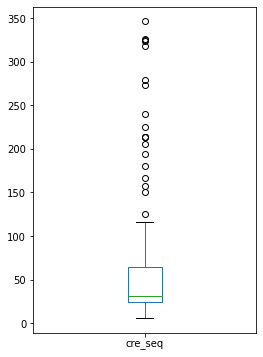

In [78]:
coord.cre_seq.apply(lambda x: len(x)).plot(kind='box', figsize=(4,6))

In [55]:
ids= coord.Uniprot.to_list()

In [59]:
kds = coord.kd_seq.to_list()

In [56]:
from Bio import SeqIO

In [57]:
output = open('../datasets/kd_cre.fasta', "w")

In [62]:
# with open('../datasets/kd_cre.fasta', "w") as output:
#     SeqIO.write(kds, output, "fasta")

In [61]:
with open("../datasets/kd_cre.fasta", "w", encoding="utf-8") as fout:
    for i, s in zip(ids, kds):
        fout.write(f">{i}\n{s}\n")
